# **A. Các kiến trúc CNN hiện đại** 

## **I. Tiến trình phát triển của CNN**

[SIFT](), [SURF](), [HOG]() là những phương pháp quan trích chọn đặc trưng thủ công, được áp dụng kết hợp với các thuật toán thủ công ML, SVM, MLP, k-NN, Random Forest,...

- Các đặc trưng được tạo ra không có khả năng huấn luyện vì qui luật tạo ra chúng là cố định.
- Pipeline tách rời giữa feature extractors và classifier.

## **II. Các đặc trưng chung của mạng CNN**

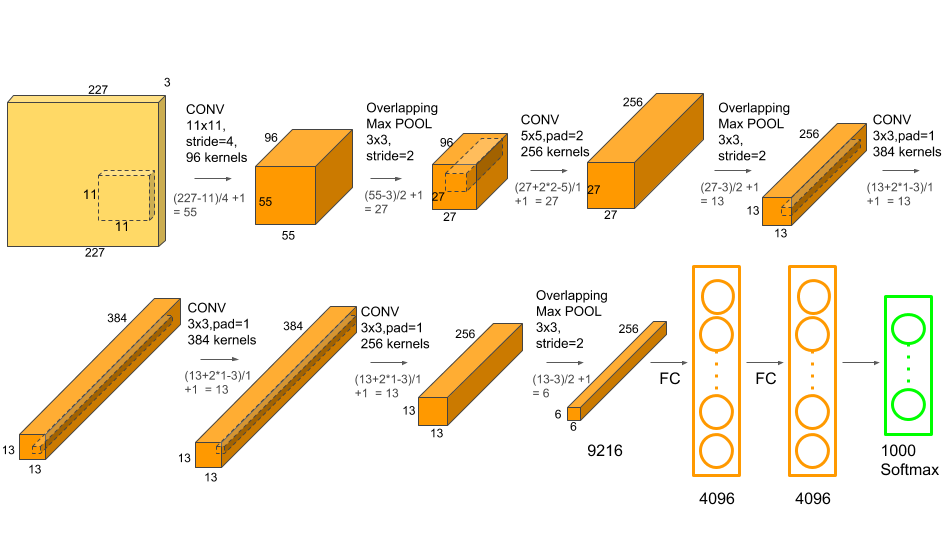

- Sử dụng tích chập:
- Kiến trúc phân tầng: Học được đặc trưng ở những cấp độ khác nhau
- Được huấn luyện trên bộ dữ liệu lớn:
- Độ sâu tầng layers tăng dần: tăng theo cấp số nhân (x2), học được da d dạng các đặc trưng
 

## **VGG Model Architecture**

## **ResNet Model Architecture**

## **Inception Model Architecture** 

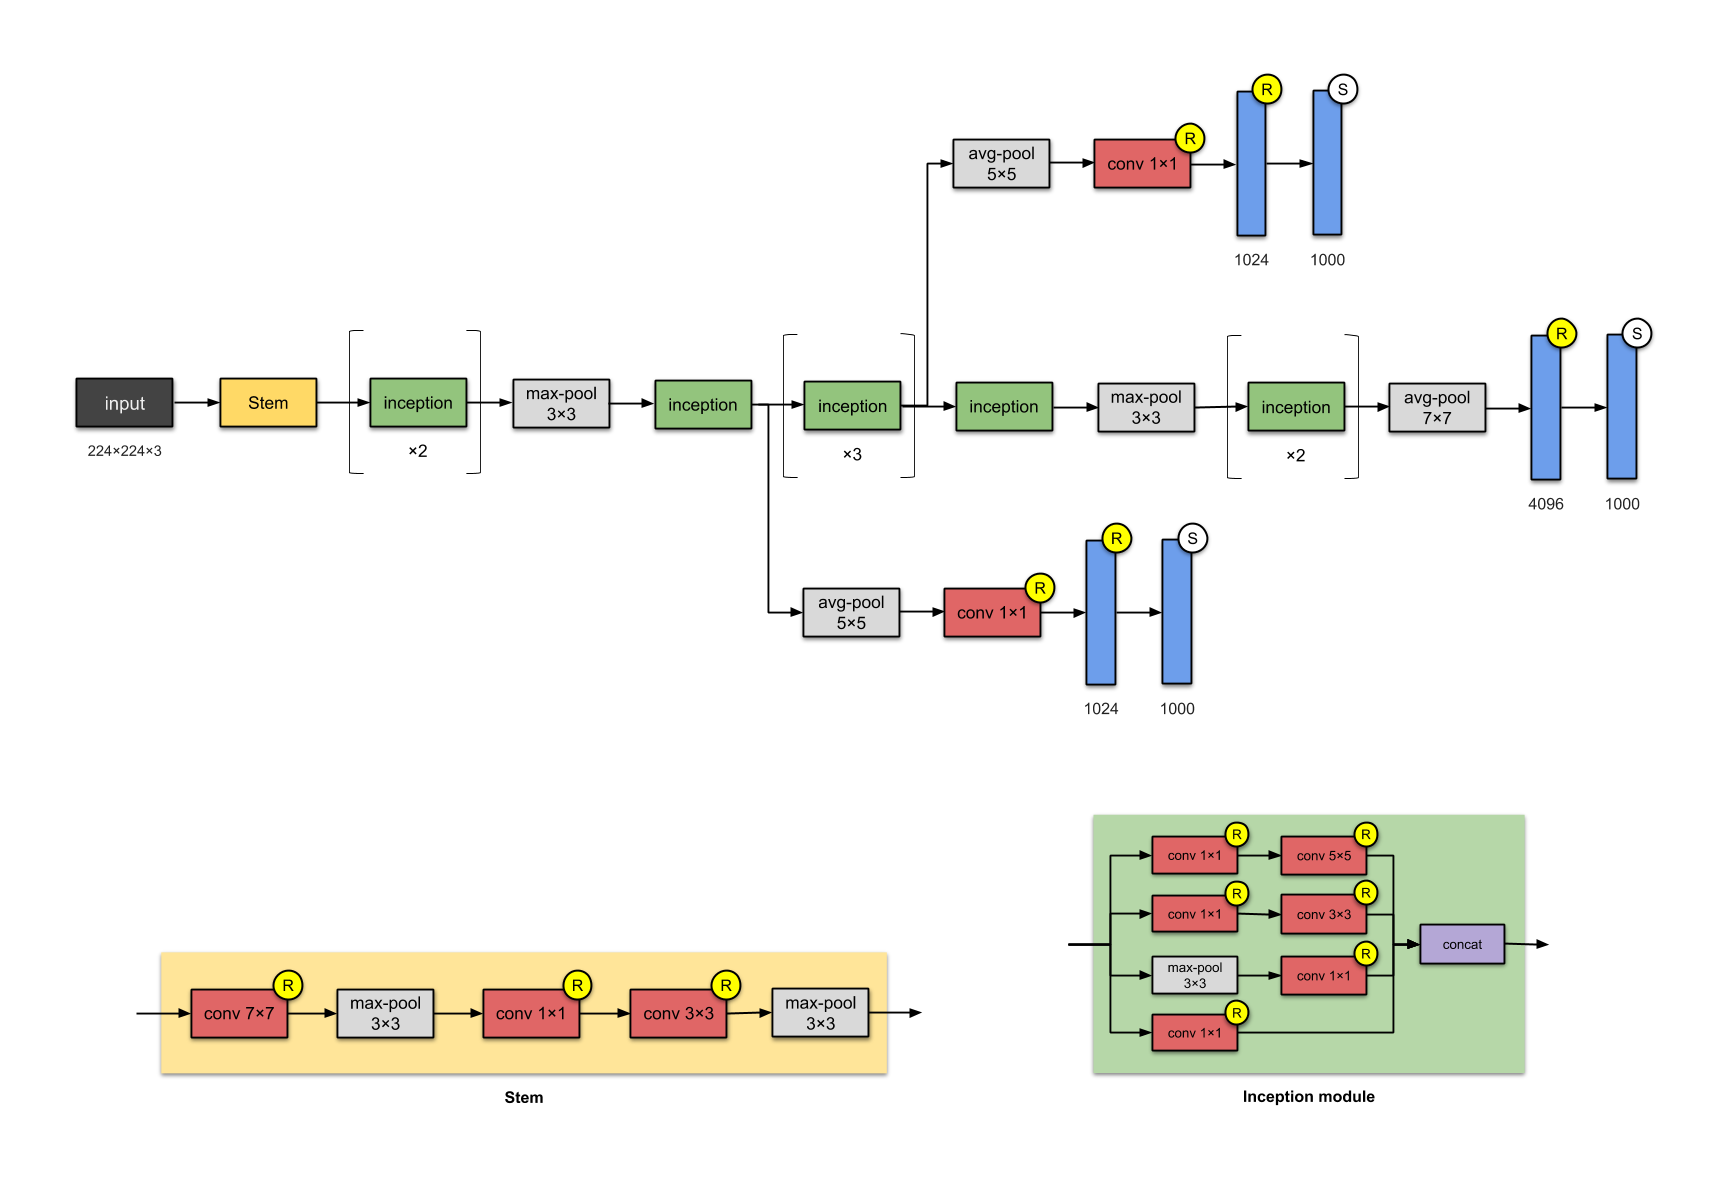

Kết hợp đồng thời các bộ lọc với đa dạng kích thước (kernel_size 11x11, 5x5, 3x3, 1x1) mang lại hiệu quả tốt

**Khối Inception:**
-  Khối Inception sẽ bao gồm 4 nhánh song song. Các bộ lọc kích thước lần lượt là 1x1, 3x3, 5x5 được áp dụng trong Inception Module giúp trích lọc được đa dạng đặc trưng trên những vùng nhận thức có kích thước khác nhau.
- Đầu các nhánh 1,2,4, phép tích chập 1x1 giảm độ sâu kênh và số lượng tham số của mô hình.
- Nhánh 3, giảm chiều dữ liệu bằng 1 layer max-pooling kích thước 3x3, áp dụng bộ lọc có kích thước 1x1 để thay đổi số kênh.
- Các nhánh áp dụng padding và stride để output có cùng kích thước chieuf dài, chiều rộng. Cuối cùng concate toàn kết quả đầu ra của các khối theo kênh để thu được output có kích bằng input


Khối Inception được lặp lại 7 lần trong kiến trúc Inception-V1. Toàn bộ mạng bao gồm 22 Layers, lớn hơn gần gấp đôi so với VGG-16. Nhờ áp dụng tích chập 1x1 giúp tiết kiệm số lượng tham số xuống chỉ còn 5 triệu, ít hơn gần 27 lần so với VGG-16.

## **Xception Model** 

### **I. Overview:**

Xception là một kiến trúc CNN có thể phân tách theo chiều sâu (Depthwise Separable Convolutions). Một tích chập có thể phân tách theo chiều sâu có thể được hiểu là mô-đun Inception với số lượng tháp cực lớn. Kiến ​​trúc mạng thần kinh tích chập sâu mới lấy cảm hứng từ Inception, trong đó các mô-đun Inception đã được thay thế bằng các cấu trúc tích chập có thể phân tách theo chiều sâu. 

### **II. Xception network**

**1. Hình dạng Model:**

Đầu tiên dữ liệu sẽ qua entry flow, tiếp theo qua Middle flow 8 lần, cuối cùng đi qua exit flow. Chú ý tất cả lớp Convolution và lớp SeparableConvolution được chuẩn hóa Batch Normalization.

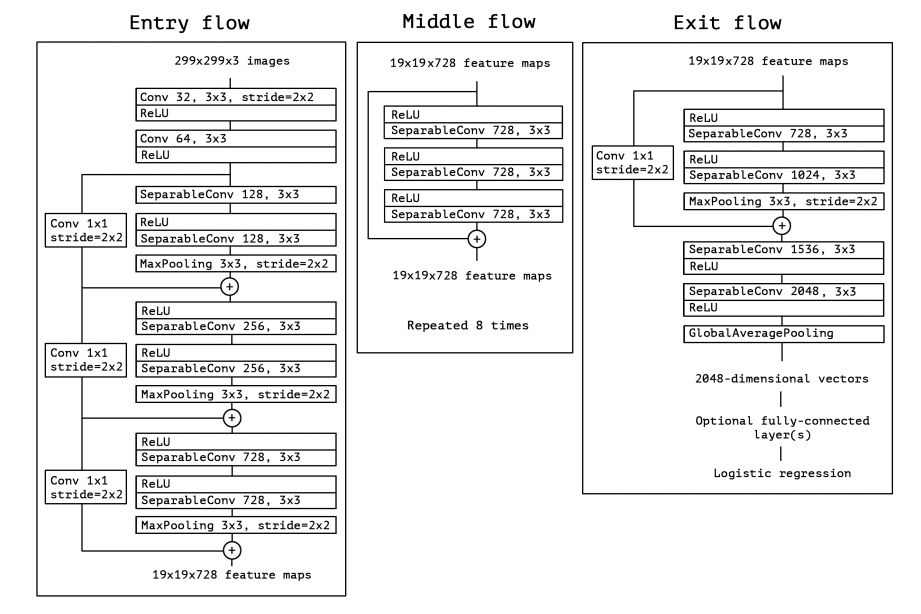

Xception mode vượt trội so với VGG-16, Inception-V3

**2. Hoạt động Xception Model:**

Có 2 đặc điểm chính:
- Tích chập có thể phân tách theo chiều sâu (Depthwise Separable Convolution)
- Các kết nối tắt giữa các Convolution như trong ResNet

**Depthwise Separable Convolution** 
Các phép chập có thể phân tách theo chiều sâu là các lựa chọn thay thế cho các phép chập cổ điển được cho là hiệu quả hơn nhiều về thời gian tính toán.

**Hạn chế của Convolution cổ điển:** Chi phí tính toán tốn kém 

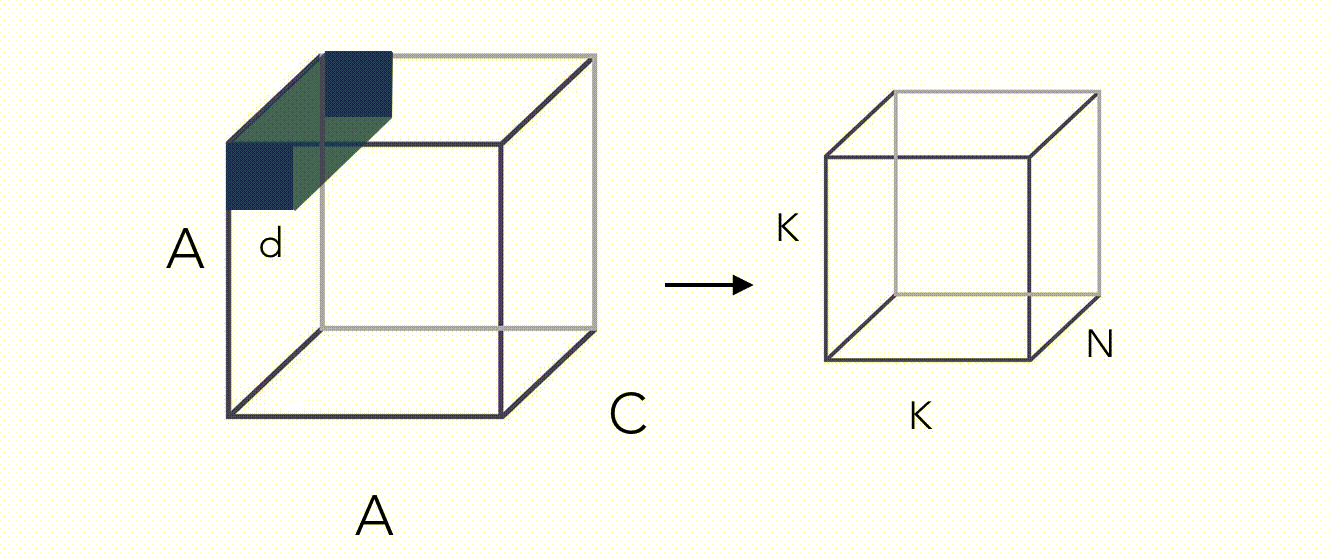

Với 1 kernel sẽ có: $${K^2 × d^2 × C}$$ phép tính

Do đó với N kernels (độ sâu convolution) số phép tính là: $${K^2 × d^2 × C × N}$$ 

Chi phí tính toán rất lớn, từ đó Depthwise Saparable Convolution ra đời. Được chia thành 2 bước chính:
- Depthwise Convolution
- Pointwise Convolution 

**<p>The Depthwise Convolution</p>**
Thay vì áp dụng convolution size $d × d × C$, chúng ta áp dụng convolution size $d × d × 1$. Tức là chúng ta không tính tích chập cho toàn bộ channels mà chỉ tính từng channels 1.

In [ ]:
from IPython.display import Image
Image(url='https://maelfabien.github.io/assets/images/XCeption.gif') 

Kích thước đầu tiên được tạo ra sẽ là $K × K × C$, thay vì $K × K × N$ như trước. Chúng ta chỉ mới thực hiện tích chập trên 1 kernel chứ chưa phải cho N kernels. Bước tiếp theo.

**<p>Pointwise Convolution</p>**

Pointwise convolution được thực hiện giống cách cổ điển, với kích thước $1 × 1 × N$. Điều đó cho phép khối có kích thước $K × K × N$

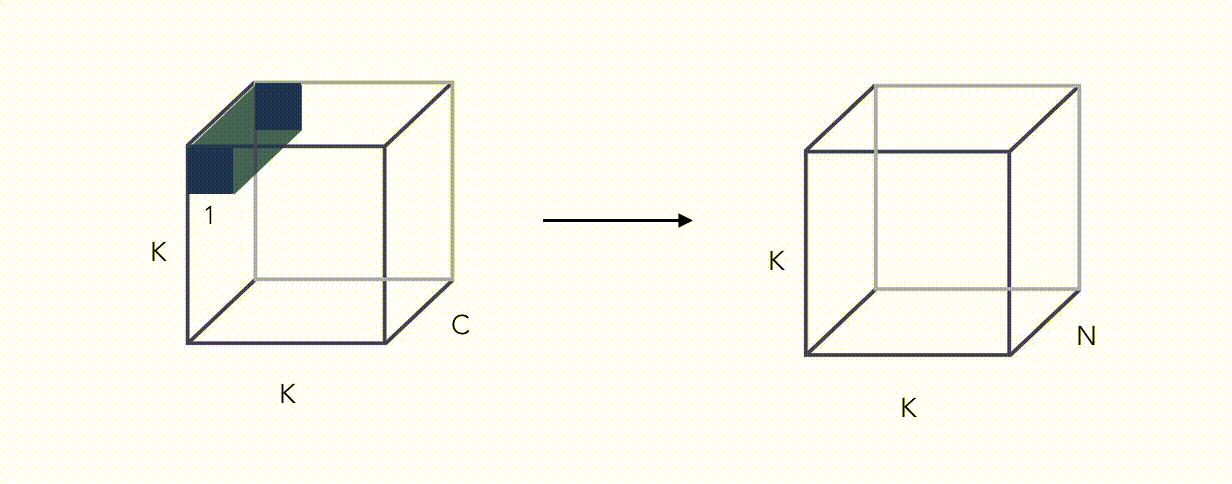

Số phép tính giảm đi N lần

**Thực hiện Xception**

<p>XCeption cung cấp một kiến ​​trúc được tạo thành từ các khối Convolution có thể tách rời theo chiều sâu + Maxpooling, tất cả được liên kết với các kết nối tắt như trong triển khai ResNet. </p>
<p>Điểm đặc biệt của XCeption là Tích chập theo chiều sâu không được theo sau bởi Tích chập theo điểm, nhưng thứ tự bị đảo ngược</p>

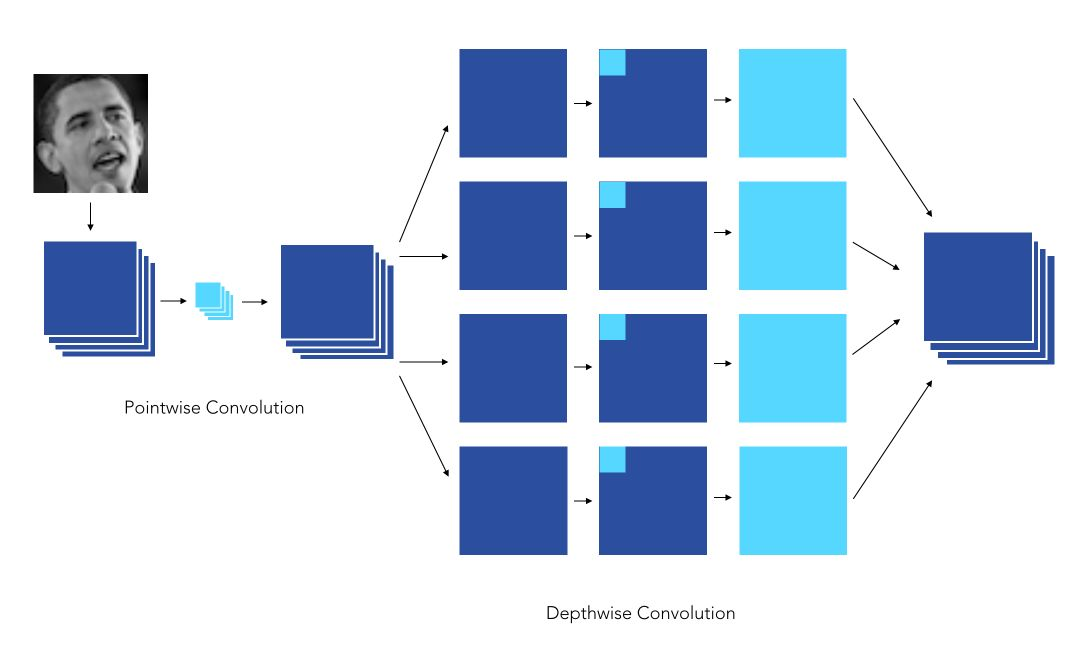

### **III. Thực hành**

In [5]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

### **Data Prepareration** 

In [6]:
import numpy as np
import torch 
from PIL import Image
from torch.utils.data import Dataset
import os

In [7]:
train_path = "data/cifar10/train/"
test_path = "data/cifar10/test/"

In [8]:
label = os.listdir(train_path)

In [33]:
import os
import pandas as pd
from torchvision.io import read_image
import cv2

class cifar10(Dataset):
    def __init__(self, path):
        super().__init__()
        self.path = path

        self.dict_label = {'airplane':0, 'automobile':1,'bird':2,
                            'cat':3,'deer':4,'dog':5,'frog':6,
                            'horse':7,'ship':8,'truck':9}
        self.imgs, self.labels = self.readImg()

    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        img = self.imgs[index]
        img = torch.from_numpy(img)
        label = self.labels[index]
        label = self.dict_label
        
        return (img, label)

    def readImg(self):
        labels = os.listdir(self.path)
        list_labels = []
        list_imgs = []
        for label in labels:
            imgs_path = os.path.join(self.path, label)
            for img in os.listdir(imgs_path):
                img_path = os.path.join(imgs_path, img)
                list_imgs.append(cv2.resize(cv2.imread(img_path), (32,32)))
                list_labels.append(label)
        return list_imgs, list_labels

In [34]:
cifar10_dataset = cifar10(train_path)
img, label = cifar10_dataset.__getitem__(1)
print(img.shape)
print(label.shape)    
label

torch.Size([32, 32, 3])


AttributeError: 'dict' object has no attribute 'shape'

In [32]:
X_, y_ = cifar10_dataset.imgs, cifar10_dataset.labels
print(len(X_))
print(len(y_))

50000
50000


In [23]:
test_data = cifar10(test_path)
X_test, y_test = test_data.imgs, test_data.labels

[[[149 156 155]
  [187 176 167]
  [193 179 176]
  ...
  [209 196 201]
  [212 202 202]
  [171 183 192]]

 [[157 155 153]
  [204 179 163]
  [215 184 171]
  ...
  [222 208 202]
  [227 215 203]
  [183 190 189]]

 [[153 154 155]
  [201 178 160]
  [213 185 168]
  ...
  [215 208 206]
  [224 215 204]
  [184 191 189]]

 ...

 [[ 62  79  89]
  [ 52  53  57]
  [ 59  61  61]
  ...
  [101 119  89]
  [ 62  79  59]
  [ 50  74  67]]

 [[ 62  82  89]
  [ 53  58  60]
  [ 58  66  63]
  ...
  [ 58  66  57]
  [ 54  64  61]
  [ 51  69  75]]

 [[ 64  78  92]
  [ 51  52  60]
  [ 51  58  61]
  ...
  [ 50  63  60]
  [ 52  65  64]
  [ 50  68  73]]]
(32, 32, 3)
airplane
10000


In [ ]:
def get_dataloader()

In [17]:
import matplotlib.pyplot as plt

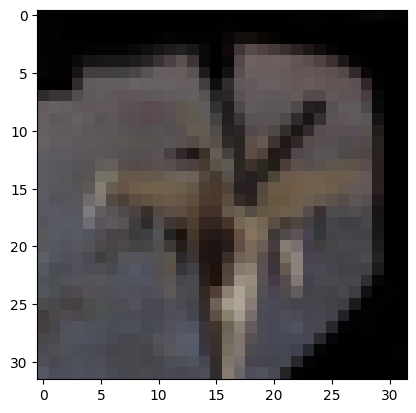

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

### **Model Design**

In [40]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

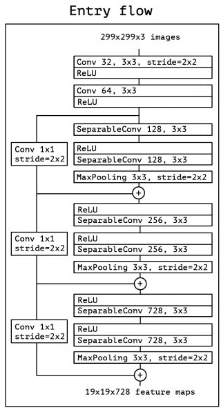

In [1]:
def entryflow(inputs):

    x = Conv2D(32, strides = 2, padding = 'same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64,3, padding = 'same')(x)
    x = BatchNormalization(x)
    x = Activation('relu')(x)

    previous_block_activation = x

    for size in [128,256,728]:

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2)    
                                                                                                                                                                                    
        residual = Conv2D(size, 1, strides=2, padding = 'same' )

        x = tensorflow.keras.layers.add()([x, residual])
        
        previous_block_activation = x

    return x


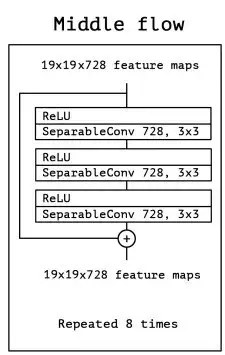

In [2]:
import tensorflow

In [3]:
def middle_flow(x, num_blocks = 8):

    previous_block_activation = x

    for _ in range(num_blocks):

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding = 'same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding = 'same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding = 'same')(x)
        x = BatchNormalization()(x)

        x = tensorflow.keras.layers.Add()([x , previous_block_activation])

        previous_block_activation = x

    return x

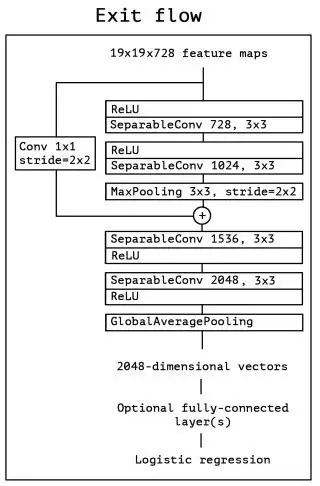

In [4]:
def exit_flow(x) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='linear')(x)
    
    return x

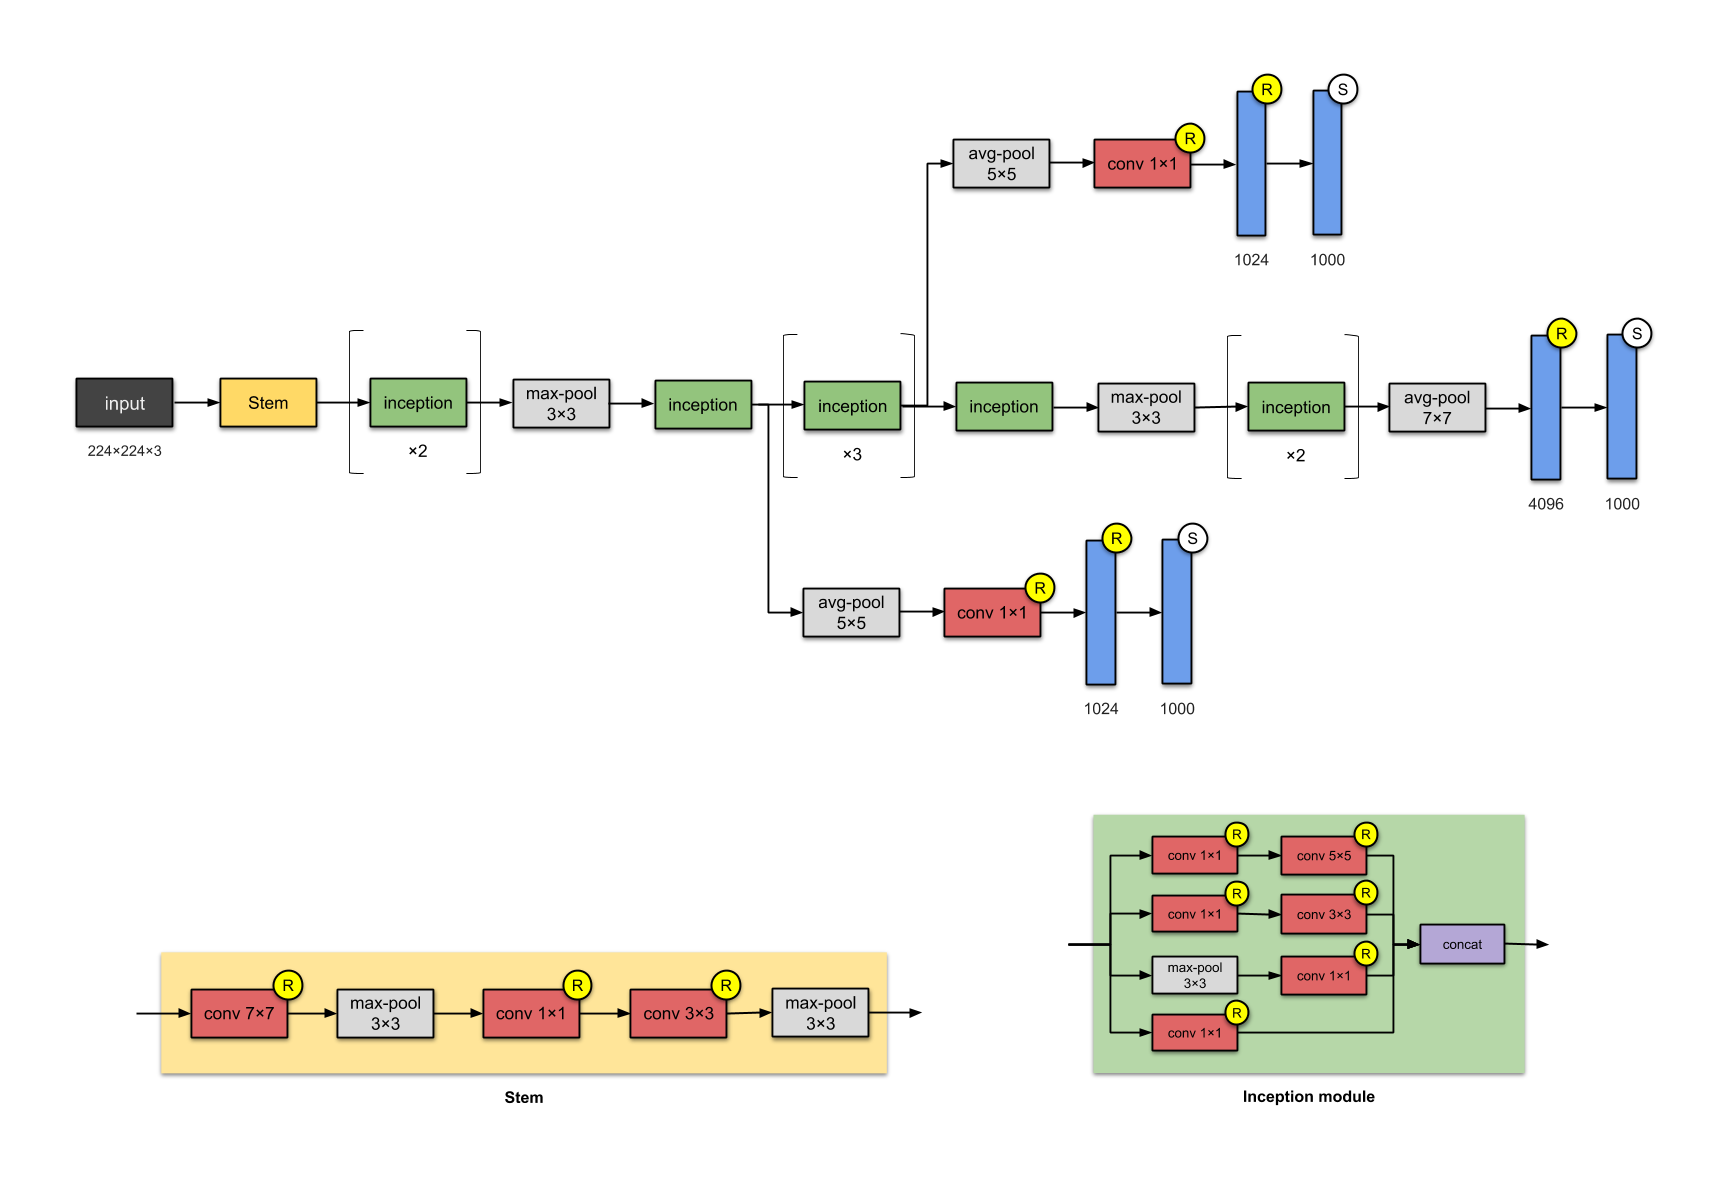

**Hình 1:** Kiến trúc GoogleNet - Inception version 1

Origin paper: https://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf

**Tài liệu tham khảo:**
- [XCeption Model and Depthwise Separable Convolutions](https://maelfabien.github.io/deeplearning/xception/#)
- [Các kiến trúc CNN hiện đại - Phamdinhkhanh](https://phamdinhkhanh.github.io/2020/05/31/CNNHistory.html) 
- [MobileNet Model - Phamdinhkhanh](https://phamdinhkhanh.github.io/2020/09/19/MobileNet.html)

**Câu hỏi:**
- Xception là gì?
- Vì sao phải phân tách theo chiều sâu?